In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


We are importing all of libraries that we will need, I like starting out with just having the library with me and pulling from it as we need, but I will also put where first start to use the library.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv("Housing.csv")


This is how we read in our CSV using pandas.

In [ ]:
# import pandas as pd
df = pd.read_csv("Housing.csv")

Now we are just going to take the top 5 rows of our data to get an explain of what the data may look like as well as giving us an example for column names and possible values.

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Now we are looking at all of the data types of our columns, we can see if our numbers are either floats or integers and then make a choice to change them.

In [ ]:
df.info(verbose=TRUE)

df['bathrooms'] = df['bathrooms'].astype(float)
df.info(verbose=TRUE)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
--

Trying to understand the data, we can find things like skews and kinda get a little idea of what the data looks like.

In [ ]:
print(df['price'].mean())
print(df['area'].mean())
print(df['price'].median())
print(df['area'].median())


4766729.247706422
5150.54128440367
4340000.0
4600.0


Now we are getting an understaning of what each of our columns look compared to each other. We are go to create a boxplot that represents what they graphs may looks like since we already found out in the code block that our data is skewed to the right. This helps us understand what our distribution looks like.

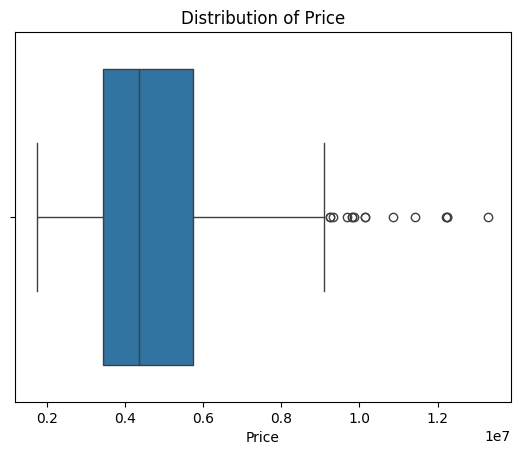

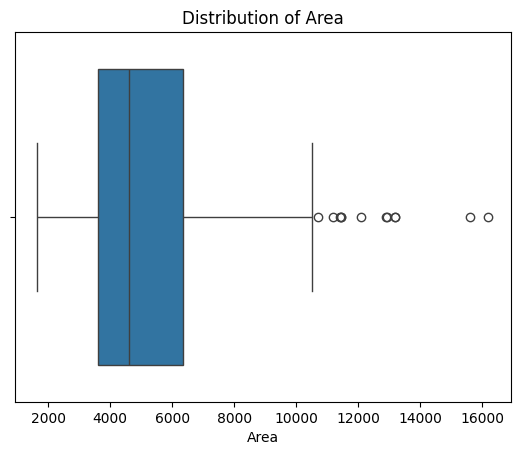

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
sns.boxplot(x=df['price']) # By setting to x we make price our x value, normal would be our y value
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

sns.boxplot(x=df['area'])
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.show()



Now we must create our independent and dependant variables for our regession model to train on and then test. First we are going to set our x value to the price and make it a 2d array. It has to be a 2d array because we need to represent how many are in the sample then the actual feature of our value.
The reason that we train our data is because we have no clue what our data looks like. It is good for the model to get an idea of what the data looks like before we ask it to predict. More we run the code it has no clue what the relationship between price and area is.

In [ ]:
# Setting price to be a 2d
x = df[['price']]
y = df['area']

# A randomly selected group of values for our train set
random_seed = 1216

# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_seed)

# Setting up out predictive model
#from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# Creating our y predition using our x
y_pred = model.predict(x_test)


R^2 Score:  0.3186259433080172
Mean Squared Error:  3531674.858722815


Now we are going to look at our R^2 statistic which goes from (-1,1), with the closer you get meaning that there is a correlation between the data and a number being zero means there is not very much of a correlation.
Next we are going to look at our Mean Squared Error is how far away on average that the data is on average from the true predicted values.

In [ ]:
# from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 Score: ",r2)
print("Mean Squared Error: ",mse)

R^2 Score:  0.3186259433080172
Mean Squared Error:  3531674.858722815


Because or R^2 is not very big we have a weak correlation and we have lots of variance from with our MSE so there is a lot of variation in the data.

Now we are gonna plot our data. This is where we are going to use MatPlot to create our scatter plots. We are gonna create 2 different scatter plots. Our clue is going to be our test data that we used. And our red data is going to be our predicted that we made from our train prediction. And a black line to represent the regression line.

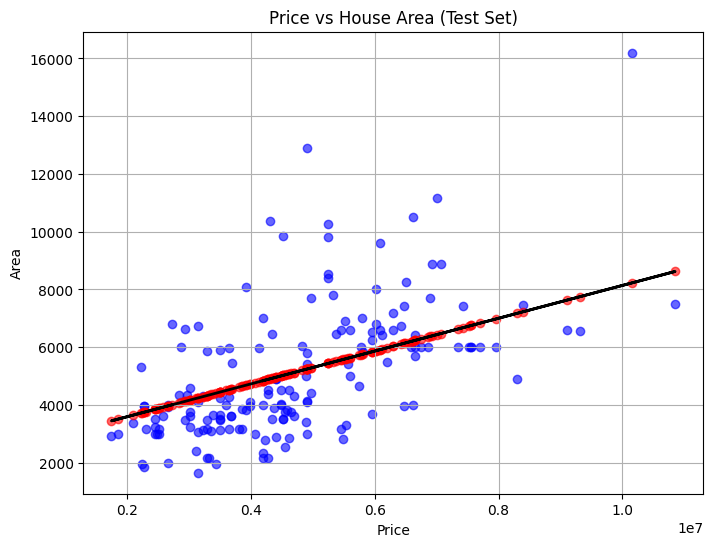

In [ ]:
# Plotting the graph

plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(x_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.plot(x_test, y_pred, color='black', linewidth=2, label='Regression Line')

plt.title('Price vs House Area (Test Set)')
plt.xlabel('Price')
plt.ylabel('Area')
plt.legend
plt.grid(True)
plt.show()

If we were intrested in taking out some our outliers we could take out the top 99 percentile to see if that changes any part of our data. This can help us see the data that may truely represent the population more.

R^2 Score:  0.2793241710178789
Mean Squared Error:  2932917.256746235


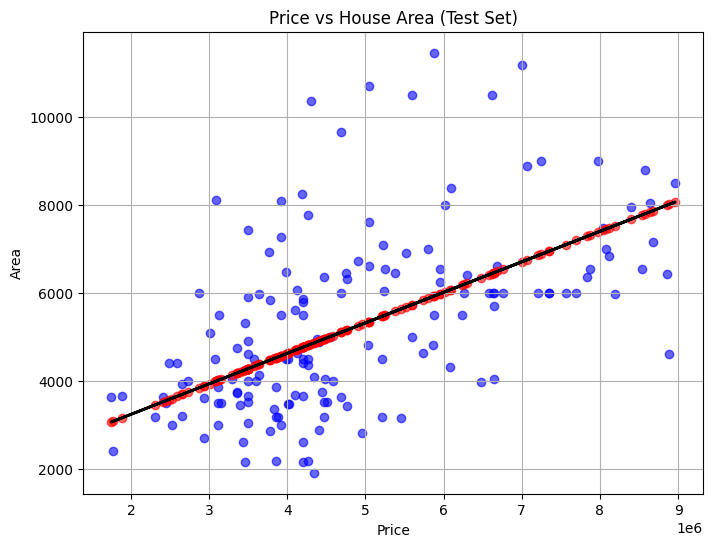

In [ ]:
threshold = df['price'].quantile(.99)
df_changed = df[df['price'] < threshold]

# Setting price to be a 2d
x = df_changed[['price']]
y = df_changed['area']

# A randomly selected group of values for our train set
random_seed = 1216

# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_seed)

# Setting up out predictive model
#from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# Creating our y predition using our x
y_pred = model.predict(x_test)


# from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 Score: ",r2)
print("Mean Squared Error: ",mse)

# Plotting the graph

plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(x_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.plot(x_test, y_pred, color='black', linewidth=2, label='Regression Line')

plt.title('Price vs House Area (Test Set)')
plt.xlabel('Price')
plt.ylabel('Area')
plt.legend
plt.grid(True)
plt.show()
